In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import tokenize
import spacy
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import csv
pd.options.display.max_columns = 30
%matplotlib inline
#nltk.download('punkt')

In [2]:
filepath = 'Ulysses.txt'
text = ''
with open(filepath, 'r') as f:
  text = f.read()
text = text.replace('â€', '')

#nltk.data.load('tokenizers/punkt/english.pickle')
tokenized_text = tokenize.sent_tokenize(text)

In [3]:
nlp = spacy.load("en_core_web_sm")
def lemmatize(text):
    doc = nlp(text)
    # Turn it into tokens, ignoring the punctuation
    tokens = [token for token in doc if not token.is_punct]
    # Convert those tokens into lemmas, EXCEPT the pronouns, we'll keep those.
    lemmas = [token.lemma_ if token.pos_ != 'PRON' else token.orth_ for token in tokens]
    return lemmas

In [4]:
vectorizer = TfidfVectorizer(max_features=100, tokenizer=lemmatize, stop_words='english', use_idf=True, norm='l1')
matrix = vectorizer.fit_transform(tokenized_text)

c:\Users\koiv\Workspace\Personal\James Joyce\Ulysses-Analysis\venv\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\koiv\Workspace\Personal\James Joyce\Ulysses-Analysis\venv\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['far', 'make', 'whereaft'] not in stop_words.
  warnings.warn(


In [5]:
vectorizer.get_feature_names_out()

array(['\n', '\n\n', '\n    ', "'s", 'arm', 'ask', 'away', 'bear', 'bit',
       'black', 'bloom', 'bring', 'come', 'course', 'day', 'dedalus',
       'door', 'eye', 'face', 'father', 'feel', 'fellow', 'foot', 'girl',
       'god', 'good', 'great', 'hand', 'hat', 'head', 'hear', 'heart',
       'high', 'hold', 'house', 'j.', 'joe', 'john', 'just', 'know',
       'laugh', 'leave', 'let', 'life', 'light', 'like', 'little', 'long',
       'look', 'lord', 'love', 'make', 'man', 'miss', 'mother', 'mr',
       'mrs', 'mulligan', 'new', 'night', 'o', 'old', 'open', 'pass',
       'place', 'point', 'poor', 'read', 'right', 'round', 'run', 's',
       'say', 'sir', 'smile', 'speak', 'stand', 'stephen', 'street',
       'tell', 'thing', 'think', 'time', 'turn', 'voice', 'wait', 'walk',
       'want', 'watch', 'water', 'way', 'white', 'wife', 'woman', 'word',
       'world', 'write', 'year', 'yes', 'young'], dtype=object)

In [6]:
feature_names = vectorizer.get_feature_names_out()
dense = matrix.toarray()
lst1 = dense.tolist()
df = pd.DataFrame(lst1, columns=feature_names)
sum = df.T.sum(axis=1)
dict = sum.to_dict()

In [7]:
del dict[list(dict.keys())[0]]
del dict[list(dict.keys())[0]]
del dict[list(dict.keys())[0]]
del dict[list(dict.keys())[0]]
dict

{'arm': 51.78103689507669,
 'ask': 132.89565029776588,
 'away': 82.40466180455707,
 'bear': 55.43540097148515,
 'bit': 55.78931263676441,
 'black': 66.08701609947438,
 'bloom': 405.75730574923597,
 'bring': 62.293605499334724,
 'come': 242.38736947225925,
 'course': 56.97047141088288,
 'day': 125.78697362555835,
 'dedalus': 63.54382491248323,
 'door': 60.29056269103717,
 'eye': 192.35742418372195,
 'face': 103.31330091318033,
 'father': 119.68049330383263,
 'feel': 91.40428836859144,
 'fellow': 65.61920368642859,
 'foot': 59.937649949682054,
 'girl': 60.558601265383956,
 'god': 106.83453813810786,
 'good': 184.70543934230503,
 'great': 53.07890047757084,
 'hand': 193.43876897067219,
 'hat': 72.03247224731824,
 'head': 97.33846600945631,
 'hear': 121.56775566535876,
 'heart': 59.831770768505535,
 'high': 57.31730129483999,
 'hold': 72.25832012204413,
 'house': 77.77387465272483,
 'j.': 63.6128376333415,
 'joe': 70.45149700245645,
 'john': 73.01234414451963,
 'just': 92.78469028862952,
 

In [8]:
sortedDict = sorted(dict.items(), key=lambda x:x[1], reverse=True)
sortedDict
with open('ulyssis_terms_cleaned.csv','w') as out:
    csv_out=csv.writer(out)
    csv_out.writerow(['Term','Frequency'])
    for row in sortedDict:
        csv_out.writerow(row)

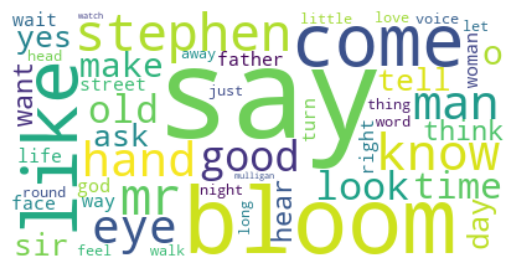

In [9]:
Cloud = WordCloud(background_color="white", max_words=50).generate_from_frequencies(dict)

plt.imshow(Cloud, interpolation='bilinear')
plt.axis("off")
plt.savefig("ulyssis_wordart_unclean.pdf")
plt.show()

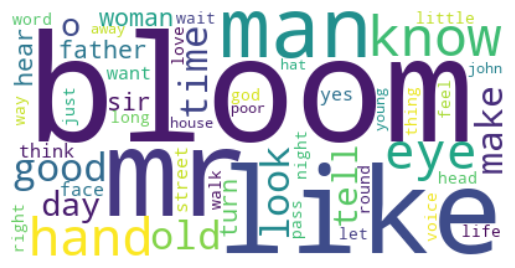

In [16]:
Cloud = WordCloud(background_color="white", max_words=50).generate_from_frequencies(dict)

plt.imshow(Cloud, interpolation='bilinear')
plt.axis("off")
plt.show()